In [83]:
import matplotlib.pyplot as plt
import pickle
import os

# ENCODER_DIR = 'trained_models/encoders/encoder_tissue_224_1024_256_30_1e-05_baseline'
ENCODER_DIR = 'trained_models/encoders/encoder_resnet50_2048'

Minimum loss: 329.1702880859375
Final loss: 329.1702880859375


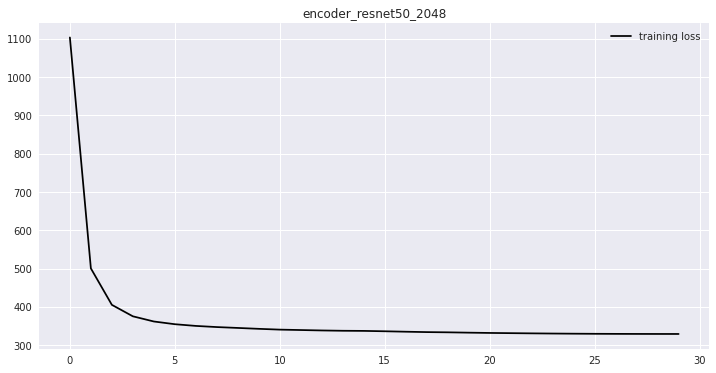

In [84]:
with open(os.path.join(ENCODER_DIR, 'history.pickle'), 'rb') as file:
    history = pickle.load(file)

print('Minimum loss:', min(history['loss']))
print('Final loss:', history['loss'][-1])

plt.figure(figsize=(12, 6))
plt.title(os.path.split(ENCODER_DIR)[-1])

plt.plot(history['loss'], label='training loss', c='k')
plt.legend()

# plt.gca().set_yscale('log')
plt.show()

In [87]:
!python evaluate_classifier.py -d "trained_models/classifiers/supervised_resnet50_0.2" -p 2048

Figure(1000x600)
At early stop epoch,
	loss: 0.03078
	acc: 0.99538
	top_2_accuracy: 0.99882
	MCC: 0.99319
	val_loss: 0.35793
	val_acc: 0.89078
	val_top_2_accuracy: 0.97734
	val_MCC: 0.83849

Calculating statistics...
Found 6935 validated image filenames belonging to 5 classes.
minor: ['junk' 'tils' 'white'] Found 1652 validated image filenames belonging to 5 classes.
major: ['stroma' 'tumor'] Found 5283 validated image filenames belonging to 5 classes.
Traceback (most recent call last):
  File "evaluate_classifier.py", line 110, in <module>
    model.load_weights(os.path.join(DIR, 'classifier.h5'))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 2211, in load_weights
    hdf5_format.load_weights_from_hdf5_group(f, self.layers)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/saving/hdf5_format.py", line 706, in load_weights_from_hdf5_group
    str(len(weight_values)) + ' elements.')
ValueError: Layer #0 (named "func

In [86]:
!python train_classifier.py

Model name: barlow_resnet50_0.2
Saving at: trained_models/classifiers/barlow_resnet50_0.2
Found 8655 validated image filenames belonging to 5 classes.
Found 6491 validated image filenames belonging to 5 classes.
Found 6935 validated image filenames belonging to 5 classes.
Number of devices: 4
Traceback (most recent call last):
  File "train_classifier.py", line 186, in <module>
    main(model_name=f'barlow_resnet50_{s}', cifar_resnet=False)
  File "train_classifier.py", line 148, in main
    model = load_model(MODEL_TYPE, len(classes), steps_per_epoch, cifar_resnet=cifar_resnet)
  File "train_classifier.py", line 112, in load_model
    encoder_trainable=encoder_trainable
  File "/tf/ssl/utils/models/resnet.py", line 31, in get_classifier
    encoder = get_encoder(input_shape=input_shape, weights=encoder_weights)
  File "/tf/ssl/utils/models/resnet.py", line 19, in get_encoder
    pooling='avg'
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/applications/resnet_v2